# EDA

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

## Load data

In [0]:
TRAINING_DATA_URL = 'https://s3.amazonaws.com/drivendata/data/7/public/4910797b-ee55-40a7-8668-10efd5c1b960.csv'
TRAINING_LABELS_URL = 'https://s3.amazonaws.com/drivendata/data/7/public/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv'

In [0]:
x_train = pd.read_csv(TRAINING_DATA_URL, index_col='id')

In [0]:
y_train = pd.read_csv(TRAINING_LABELS_URL, index_col='id')
y_train.head()

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional


In [0]:
df_train = x_train.merge(y_train, on='id')
df_train.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [0]:
df_train.describe()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 40 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
recorded_by              59400 non-null obj

In [0]:
CONTINOUS_VALUE_COLUMNS = ['longitude', 'latitude']
DATE_COLUMNS = []
ORDINAL_VALUE_COLUMNS = []
NOMINAL_VALUE_COLUMNS = [ 'basin','region', 'district_code','scheme_management', #'installer',
                         'extraction_type_class', 'payment',  'quantity','source_class', 'waterpoint_type']
BOOLEAN_VALUE_COLUMNS = ['permit', 'public_meeting']
TARGET_COLUMN = 'status_group'

len(CONTINOUS_VALUE_COLUMNS)+len(DATE_COLUMNS)+len(ORDINAL_VALUE_COLUMNS)+len(NOMINAL_VALUE_COLUMNS)+len(BOOLEAN_VALUE_COLUMNS)

13

In [0]:
filtered_df_train = df_train[CONTINOUS_VALUE_COLUMNS + DATE_COLUMNS + ORDINAL_VALUE_COLUMNS + NOMINAL_VALUE_COLUMNS+BOOLEAN_VALUE_COLUMNS+[TARGET_COLUMN]]
filtered_df_train.head()

,longitude,latitude,basin,region,district_code,scheme_management,extraction_type_class,payment,quantity,source_class,waterpoint_type,permit,public_meeting,status_group
id,,,,,,,,,,,,,,
69572,34.938093,-9.856322,Lake Nyasa,Iringa,5,VWC,gravity,pay annually,enough,groundwater,communal standpipe,False,True,functional
8776,34.698766,-2.147466,Lake Victoria,Mara,2,Other,gravity,never pay,insufficient,surface,communal standpipe,True,NaN,functional
34310,37.460664,-3.821329,Pangani,Manyara,4,VWC,gravity,pay per bucket,enough,surface,communal standpipe multiple,True,True,functional
67743,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,VWC,submersible,never pay,dry,groundwater,communal standpipe multiple,True,True,non functional
19728,31.130847,-1.825359,Lake Victoria,Kagera,1,NaN,gravity,never pay,seasonal,surface,communal standpipe,True,True,functional


In [0]:
filtered_df_train.permit.fillna(False, inplace=True)
filtered_df_train.scheme_management.fillna('Other', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [0]:
filtered_df_train['public_meeting'] = filtered_df_train['public_meeting'].apply(lambda x : 1 if x==True else 0)
filtered_df_train['permit'] = filtered_df_train['permit'].apply(lambda x : 1 if x==True else 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
filtered_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 14 columns):
longitude                59400 non-null float64
latitude                 59400 non-null float64
basin                    59400 non-null object
region                   59400 non-null object
district_code            59400 non-null int64
scheme_management        59400 non-null object
extraction_type_class    59400 non-null object
payment                  59400 non-null object
quantity                 59400 non-null object
source_class             59400 non-null object
waterpoint_type          59400 non-null object
permit                   59400 non-null int64
public_meeting           59400 non-null int64
status_group             59400 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 6.8+ MB


In [0]:
filtered_df_train.head()

,longitude,latitude,basin,region,district_code,scheme_management,extraction_type_class,payment,quantity,source_class,waterpoint_type,permit,public_meeting,status_group
id,,,,,,,,,,,,,,
69572,34.938093,-9.856322,Lake Nyasa,Iringa,5,VWC,gravity,pay annually,enough,groundwater,communal standpipe,0,1,functional
8776,34.698766,-2.147466,Lake Victoria,Mara,2,Other,gravity,never pay,insufficient,surface,communal standpipe,1,0,functional
34310,37.460664,-3.821329,Pangani,Manyara,4,VWC,gravity,pay per bucket,enough,surface,communal standpipe multiple,1,1,functional
67743,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,63,VWC,submersible,never pay,dry,groundwater,communal standpipe multiple,1,1,non functional
19728,31.130847,-1.825359,Lake Victoria,Kagera,1,Other,gravity,never pay,seasonal,surface,communal standpipe,1,1,functional


In [0]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
result = encoder.fit_transform(filtered_df_train[NOMINAL_VALUE_COLUMNS])
# result
encoder.get_feature_names()

array(['x0_Internal', 'x0_Lake Nyasa', 'x0_Lake Rukwa',
       'x0_Lake Tanganyika', 'x0_Lake Victoria', 'x0_Pangani',
       'x0_Rufiji', 'x0_Ruvuma / Southern Coast', 'x0_Wami / Ruvu',
       'x1_Arusha', 'x1_Dar es Salaam', 'x1_Dodoma', 'x1_Iringa',
       'x1_Kagera', 'x1_Kigoma', 'x1_Kilimanjaro', 'x1_Lindi',
       'x1_Manyara', 'x1_Mara', 'x1_Mbeya', 'x1_Morogoro', 'x1_Mtwara',
       'x1_Mwanza', 'x1_Pwani', 'x1_Rukwa', 'x1_Ruvuma', 'x1_Shinyanga',
       'x1_Singida', 'x1_Tabora', 'x1_Tanga', 'x2_0', 'x2_1', 'x2_2',
       'x2_3', 'x2_4', 'x2_5', 'x2_6', 'x2_7', 'x2_8', 'x2_13', 'x2_23',
       'x2_30', 'x2_33', 'x2_43', 'x2_53', 'x2_60', 'x2_62', 'x2_63',
       'x2_67', 'x2_80', 'x3_Company', 'x3_None', 'x3_Other',
       'x3_Parastatal', 'x3_Private operator', 'x3_SWC', 'x3_Trust',
       'x3_VWC', 'x3_WUA', 'x3_WUG', 'x3_Water Board',
       'x3_Water authority', 'x4_gravity', 'x4_handpump', 'x4_motorpump',
       'x4_other', 'x4_rope pump', 'x4_submersible', 'x4_wind-powe

In [0]:
from sklearn.preprocessing import OrdinalEncoder
target_enc = OrdinalEncoder()
target_result = target_enc.fit_transform(filtered_df_train[TARGET_COLUMN].values.reshape(-1,1))

In [0]:
from sklearn.preprocessing import PowerTransformer
p_trans = PowerTransformer()
continous_values_transformed = p_trans.fit_transform(filtered_df_train[CONTINOUS_VALUE_COLUMNS])

In [0]:
output_cols = CONTINOUS_VALUE_COLUMNS.copy()
output_cols.extend(BOOLEAN_VALUE_COLUMNS.copy())
output_cols.extend(encoder.get_feature_names())
output_cols.append('target')
output_data = np.copy(result)
output_data = np.concatenate((continous_values_transformed, filtered_df_train[BOOLEAN_VALUE_COLUMNS], result, target_result),axis =1)
output_cols
df_output = pd.DataFrame(output_data, columns=output_cols)
df_output.head()

,longitude,latitude,permit,public_meeting,x0_Internal,x0_Lake Nyasa,x0_Lake Rukwa,x0_Lake Tanganyika,x0_Lake Victoria,x0_Pangani,x0_Rufiji,x0_Ruvuma / Southern Coast,x0_Wami / Ruvu,x1_Arusha,x1_Dar es Salaam,x1_Dodoma,x1_Iringa,x1_Kagera,x1_Kigoma,x1_Kilimanjaro,x1_Lindi,x1_Manyara,x1_Mara,x1_Mbeya,x1_Morogoro,x1_Mtwara,x1_Mwanza,x1_Pwani,x1_Rukwa,x1_Ruvuma,x1_Shinyanga,x1_Singida,x1_Tabora,x1_Tanga,x2_0,x2_1,x2_2,x2_3,x2_4,x2_5,...,x3_Other,x3_Parastatal,x3_Private operator,x3_SWC,x3_Trust,x3_VWC,x3_WUA,x3_WUG,x3_Water Board,x3_Water authority,x4_gravity,x4_handpump,x4_motorpump,x4_other,x4_rope pump,x4_submersible,x4_wind-powered,x5_never pay,x5_other,x5_pay annually,x5_pay monthly,x5_pay per bucket,x5_pay when scheme fails,x5_unknown,x6_dry,x6_enough,x6_insufficient,x6_seasonal,x6_unknown,x7_groundwater,x7_surface,x7_unknown,x8_cattle trough,x8_communal standpipe,x8_communal standpipe multiple,x8_dam,x8_hand pump,x8_improved spring,x8_other,target
0,-0.017877,-1.344013,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.090077,1.235144,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.808415,0.584308,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.179788,-1.710133,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,-1.047628,1.371361,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Oversample

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


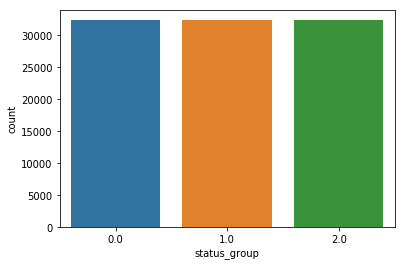

In [0]:
from imblearn.over_sampling import SMOTE
over_sampling = SMOTE(random_state=42, k_neighbors=5)
x_over_sampled, y_over_sampled = over_sampling.fit_resample(df_output.drop('target', axis=1), df_output.target)
sns.countplot(x='status_group', data=pd.DataFrame(y_over_sampled, columns=['status_group']));

In [0]:
df_oversampled = pd.DataFrame(np.column_stack((x_over_sampled, y_over_sampled)), columns=df_output.columns)
df_oversampled.head()

,longitude,latitude,permit,public_meeting,x0_Internal,x0_Lake Nyasa,x0_Lake Rukwa,x0_Lake Tanganyika,x0_Lake Victoria,x0_Pangani,x0_Rufiji,x0_Ruvuma / Southern Coast,x0_Wami / Ruvu,x1_Arusha,x1_Dar es Salaam,x1_Dodoma,x1_Iringa,x1_Kagera,x1_Kigoma,x1_Kilimanjaro,x1_Lindi,x1_Manyara,x1_Mara,x1_Mbeya,x1_Morogoro,x1_Mtwara,x1_Mwanza,x1_Pwani,x1_Rukwa,x1_Ruvuma,x1_Shinyanga,x1_Singida,x1_Tabora,x1_Tanga,x2_0,x2_1,x2_2,x2_3,x2_4,x2_5,...,x3_Other,x3_Parastatal,x3_Private operator,x3_SWC,x3_Trust,x3_VWC,x3_WUA,x3_WUG,x3_Water Board,x3_Water authority,x4_gravity,x4_handpump,x4_motorpump,x4_other,x4_rope pump,x4_submersible,x4_wind-powered,x5_never pay,x5_other,x5_pay annually,x5_pay monthly,x5_pay per bucket,x5_pay when scheme fails,x5_unknown,x6_dry,x6_enough,x6_insufficient,x6_seasonal,x6_unknown,x7_groundwater,x7_surface,x7_unknown,x8_cattle trough,x8_communal standpipe,x8_communal standpipe multiple,x8_dam,x8_hand pump,x8_improved spring,x8_other,target
0,-0.017877,-1.344013,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.090077,1.235144,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.808415,0.584308,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.179788,-1.710133,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,-1.047628,1.371361,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## XGBoost

In [0]:
x = df_oversampled.drop('target', axis=1)
y = df_oversampled.target

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)

In [0]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

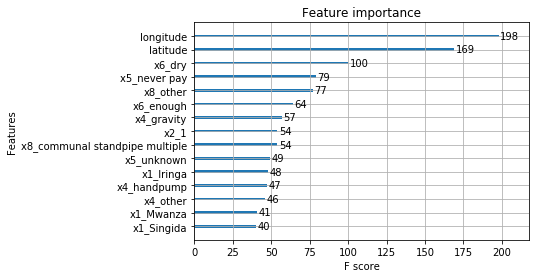

In [0]:
from xgboost import plot_importance
plot_importance(model, max_num_features=15)

In [0]:
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from xgboost import XGBClassifier

# params_model1 = {
#     'booster': ['dart', 'gbtree'],
#     'learning_rate': [0.001, 0.01, 0.05, 0.1],
#     'min_child_weight': [1,5,10,15,20],
#     'gamma': [0, 0.5, 1, 1.5, 2, 5],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'max_depth': [3, 4, 5, 6, 7, 8],
#     'max_delta_step': [0, 1, 2,3,5, 10],
#     'base_score': [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65],
#     'reg_alpha':[0, 0.5, 1, 1.5, 2],
#     'reg_lambda': [0, 0.5, 1, 1.5, 2]
# }

# model1 = XGBClassifier(n_estimators=1000, learning_rate=0.01, subsample=0.8, 
#                       gamma=0, max_depth=4, colsample_bytree=1, )
# rs_model1 = RandomizedSearchCV(model1, param_distributions=params_model1, n_iter=10, 
#                                scoring='roc_auc', n_jobs=4, cv=skf.split(x,y), verbose=3, random_state=1001 )
# rs_model1.fit(x,y)

# rs_model1.best_score_, rs_model1.best_params_ 

## AutoML

In [0]:
! apt-get install default-jre
! java -version
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
openjdk version "11.0.3" 2019-04-16
OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1)
OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)
     |████████████████████████████████| 122.7MB 275kB/s 
  Created wheel for h2o: filename=h2o-3.26.0.2-py2.py3-none-any.whl size=122725647 sha256=1cb28eaf86243843a08790a6e74810f624c9b615b21b8307fc61eb6d3b0686c4
  Stored in directory: /root/.cache/pip/wheels/76/01/62/d6b7bfc9d599463401118db95eab37c134a6f24040828d31ab
Successfully built h2o


In [0]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.3" 2019-04-16; OpenJDK Runtime Environment (build 11.0.3+7-Ubuntu-1ubuntu218.04.1); OpenJDK 64-Bit Server VM (build 11.0.3+7-Ubuntu-1ubuntu218.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpv5y6edh0
  JVM stdout: /tmp/tmpv5y6edh0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpv5y6edh0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Etc/UTC
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.2
H2O cluster version age:,12 days
H2O cluster name:,H2O_from_python_unknownUser_hol3u0
H2O cluster total nodes:,1
H2O cluster free memory:,5 Gb
H2O cluster total cores:,2
H2O cluster allowed cores:,2
H2O cluster status:,"accepting new members, healthy"


In [0]:
h2o_data = h2o.H2OFrame(df_oversampled)
target_idx = h2o_data.col_names.index('target')
h2o_data[target_idx] = h2o_data[target_idx].asfactor()
aml = H2OAutoML(max_models = 5, seed = 1)
aml.train(y = 'target', training_frame = h2o_data )

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


In [0]:
aml.leaderboard

model_id,mean_per_class_error,logloss,rmse,mse
XGBoost_2_AutoML_20190808_185351,0.196545,0.547424,0.429314,0.18431
StackedEnsemble_BestOfFamily_AutoML_20190808_185351,0.19672,0.494255,0.399095,0.159277
StackedEnsemble_AllModels_AutoML_20190808_185351,0.196741,0.494091,0.398944,0.159156
XGBoost_1_AutoML_20190808_185351,0.25597,0.731982,0.524399,0.274994


In [0]:
aml_leader = aml.leader
aml_leader.confusion_matrix(h2o_data)

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class



0,1,2,Error,Rate
24897.0,3947.0,3415.0,0.2282154,"7,362 / 32,259"
2824.0,28495.0,940.0,0.1166806,"3,764 / 32,259"
5266.0,2629.0,24364.0,0.2447379,"7,895 / 32,259"
32987.0,35071.0,28719.0,0.1965446,"19,021 / 96,777"


TypeError: ignored